In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/CV/Lab5/
!ls

from IPython.display import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure as ex
from skimage import restoration, transform, color, morphology
from scipy import signal, ndimage
import math, my


##Дилатація, Ерозія 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f17e6162c18>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f17e6127d30>)

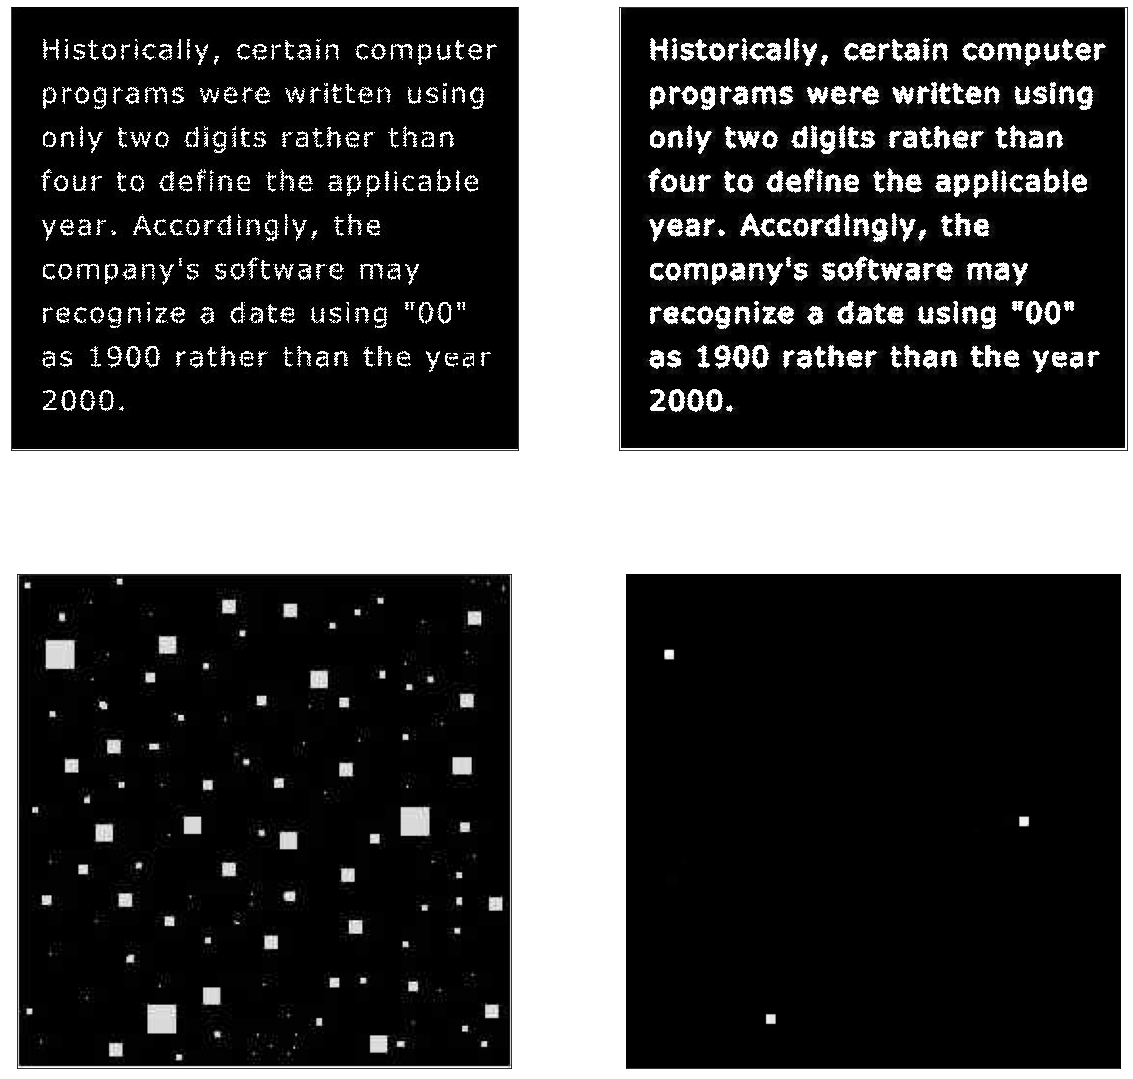

In [ ]:
pic1_orig = cv2.imread('pic.1.jpg',0)
pic2_orig = cv2.imread('pic.2.jpg',0)

image1_np=np.array(pic1_orig)
image2_np=np.array(pic2_orig)

kernel_Diamond3 = my.diamond(3)
kernel_Ones = np.ones([11, 11])

Dilation  = morphology.dilation(image1_np, kernel_Diamond3)
Erosion   = morphology.erosion(image2_np, kernel_Ones)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(image1_np, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(Dilation, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(image2_np, cmap='gray')
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]),plt.imshow(Erosion, cmap='gray')

##Розмикання та замикання

(<matplotlib.axes._subplots.AxesSubplot at 0x7f17e4292588>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f17e424fa58>)

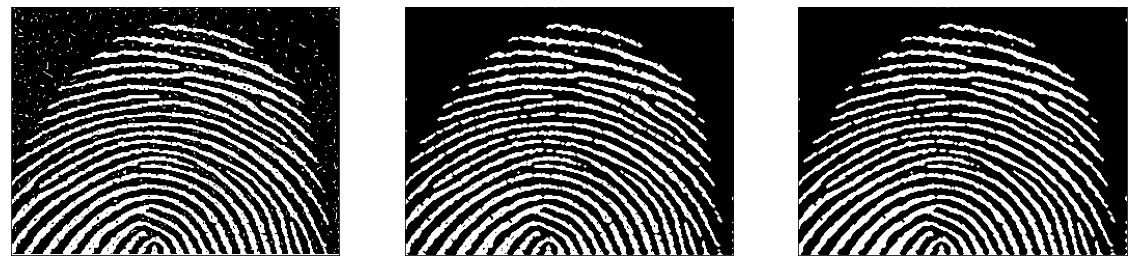

In [ ]:
pic3_orig = cv2.imread('pic.3.jpg',0)
pic3_binary = cv2.threshold(pic3_orig, 128, 255, cv2.THRESH_BINARY)[1]
pic3_binary[pic3_binary>1] = 1
pic3_binary[pic3_binary<0] = 0

image3_np=np.array(pic3_binary)

opening  = morphology.binary_opening(image3_np, kernel_Diamond3)
closing  = morphology.binary_closing(opening, kernel_Diamond3)

plt.figure(figsize = (20,20))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(image3_np, cmap='gray')
plt.subplot(1,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(opening, cmap='gray')
plt.subplot(1,3,3), plt.xticks([]), plt.yticks([]),plt.imshow(closing, cmap='gray')

##Потоншення, Побудова остова

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6994991358>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f699494e828>)

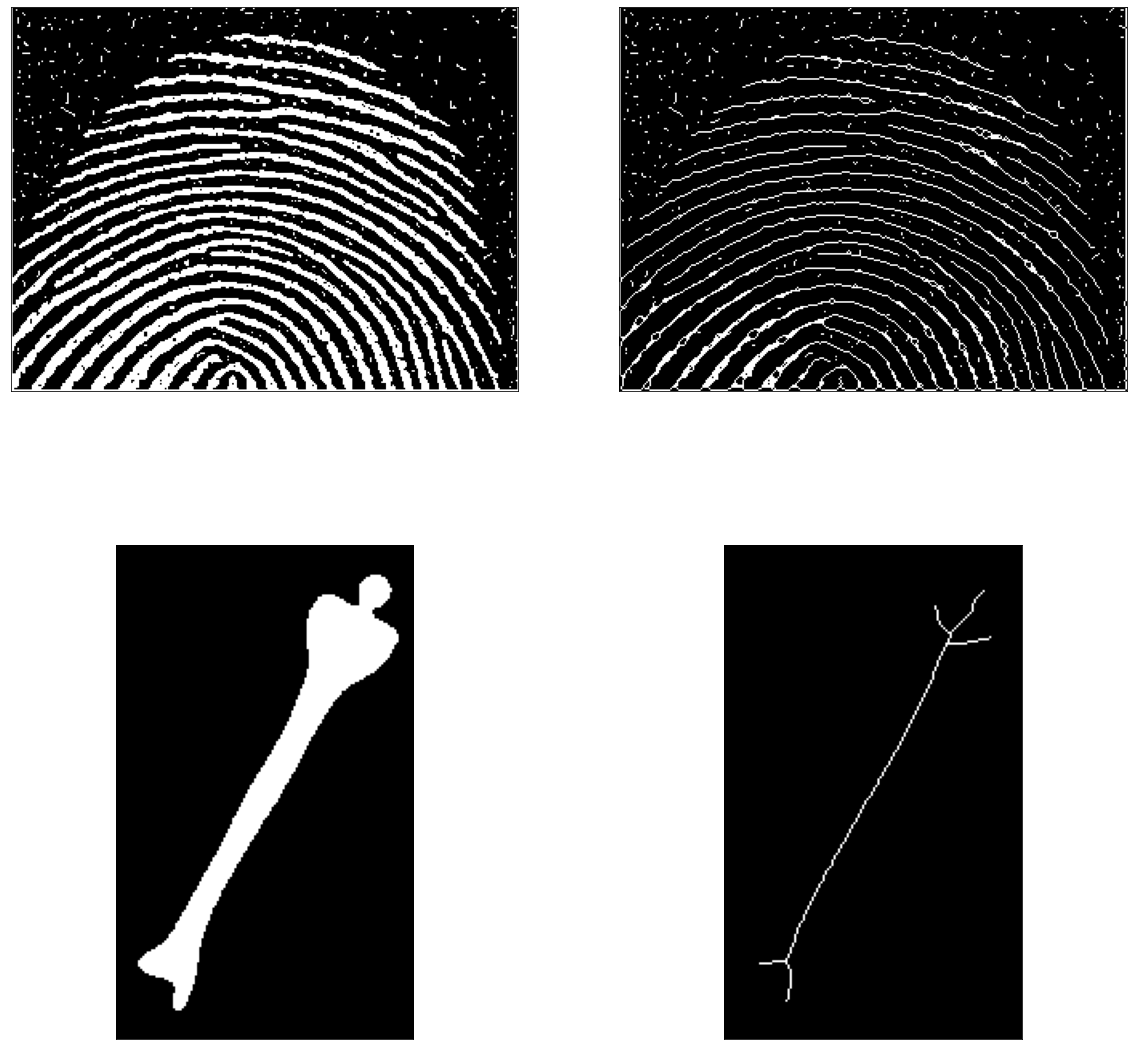

In [ ]:
pic4_orig = cv2.imread('pic.4.jpg', 0)

pic3_binary = cv2.threshold(pic3_orig, 128, 255, cv2.THRESH_BINARY)[1]
pic3_binary[pic3_binary>1] = 1
pic3_binary[pic3_binary<0] = 0
pic4_binary = cv2.threshold(pic4_orig, 128, 255, cv2.THRESH_BINARY)[1]
pic4_binary[pic4_binary>1] = 1
pic4_binary[pic4_binary<0] = 0

Thinned  = morphology.thin(pic3_binary, max_iter=2)
Sceleton = morphology.skeletonize(pic4_binary)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic3_binary, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(Thinned , cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(pic4_binary, cmap='gray')
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(Sceleton, cmap='gray')

##Пошук компонент зв’язності

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  


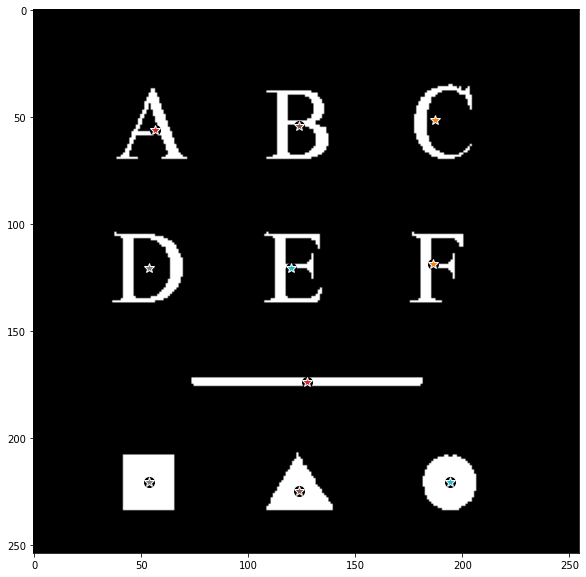

In [ ]:
pic5_orig = cv2.imread('pic.5.jpg', 0)
pic5_binary = cv2.threshold(pic5_orig, 128, 255, cv2.THRESH_BINARY)[1]
pic5_binary[pic5_binary>1] = 1
pic5_binary[pic5_binary<0] = 0

Label, n = morphology.label(pic5_binary, neighbors= 8, return_num=True)

plt.figure(figsize = (10,10))
plt.imshow(pic5_binary, cmap='gray')

for k in range(1, n+1):
  r, c = np.nonzero(Label == k)
  rbar = np.mean(r)
  cbar = np.mean(c)
  plt.plot([cbar], [rbar], marker = 'o', markeredgecolor = 'k', markerfacecolor = 'k', markersize = 10)
  plt.plot([cbar], [rbar], marker = '*', markeredgecolor = 'w',  markersize = 10)
plt.show()

##Морфологічна реконструкція

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6994e7f9b0>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f6994ebbe80>)

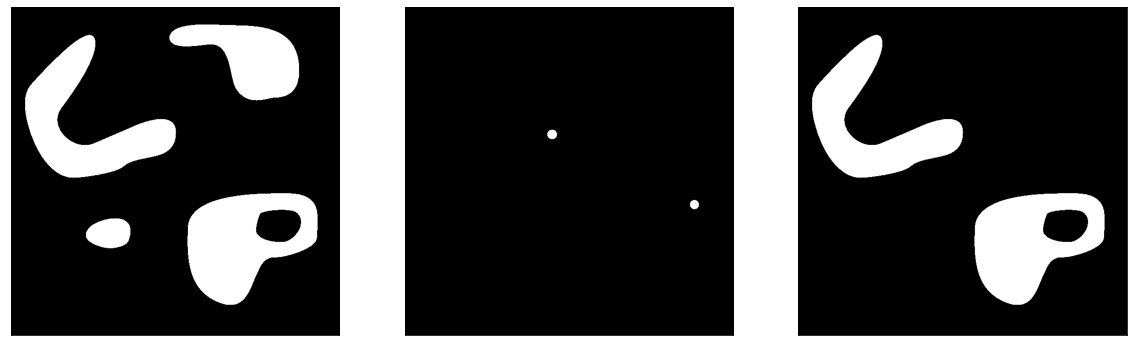

In [ ]:
pic6a_orig = cv2.imread('pic.6a.tif', 0)
pic6a_binary = cv2.threshold(pic6a_orig, 128, 255, cv2.THRESH_BINARY)[1]
pic6b_orig = cv2.imread('pic.6b.tif', 0)
pic6b_binary = cv2.threshold(pic6b_orig, 128, 255, cv2.THRESH_BINARY)[1]

out = morphology.reconstruction(pic6b_binary, pic6a_binary)

plt.figure(figsize = (20,20))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic6a_binary, cmap='gray')
plt.subplot(1,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(pic6b_binary, cmap='gray')
plt.subplot(1,3,3), plt.xticks([]), plt.yticks([]), plt.imshow(out, cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9de943e518>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f9de93fba58>)

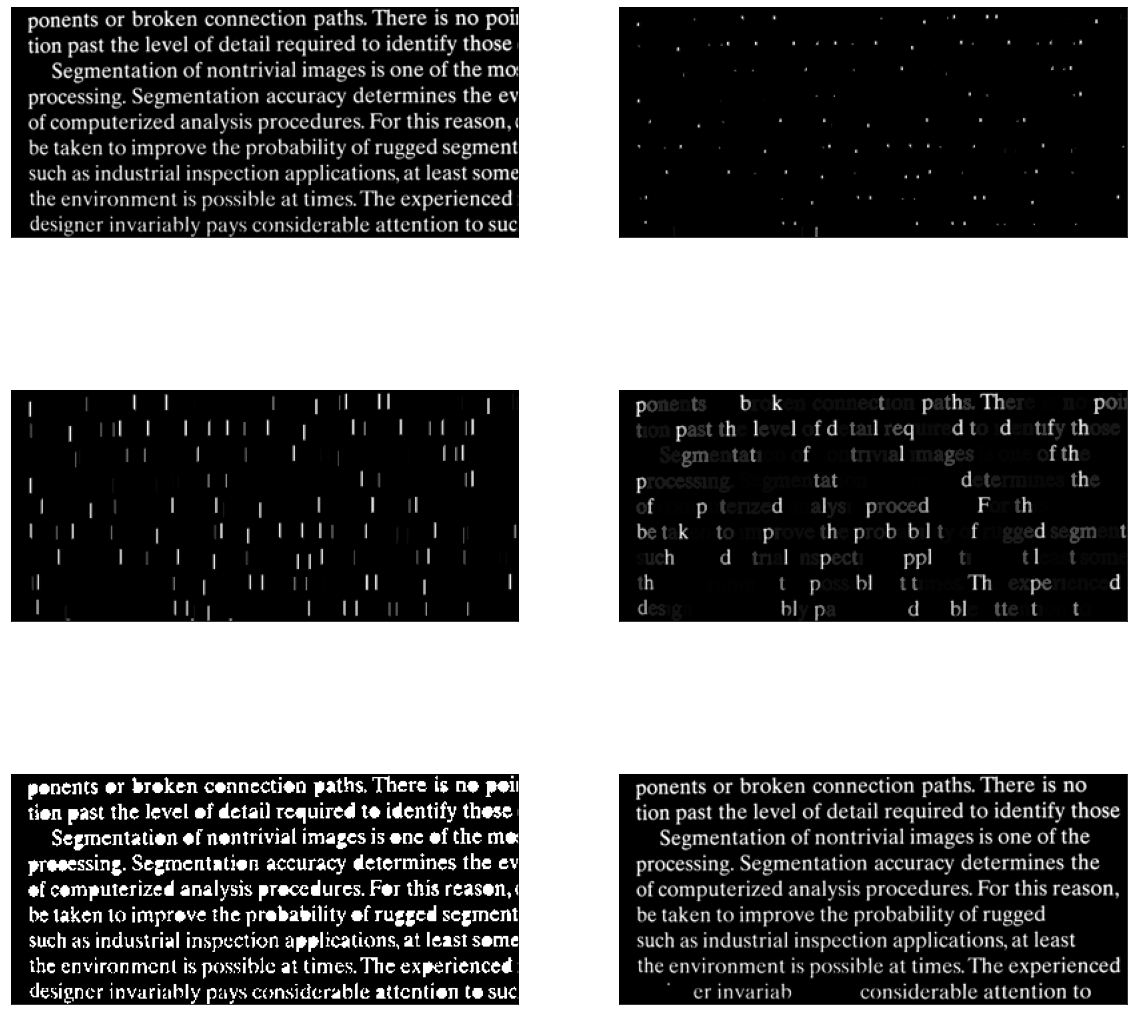

In [ ]:
pic7_orig = cv2.imread('pic.7.png', 0)
pic7_binary = cv2.threshold(pic7_orig, 75, 255, cv2.THRESH_BINARY)[1]

f_e   = morphology.erosion(pic7_orig, np.ones([10, 1]))
f_o   = morphology.opening(pic7_orig, np.ones([10, 1]))
f_er  = morphology.reconstruction(f_e, pic7_orig)
f_f   = ndimage.morphology.binary_fill_holes(pic7_binary)
f_cb  = my.imclearborder(pic7_orig, 1)
                     
plt.figure(figsize = (20,20))
plt.subplot(3,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic7_orig, cmap='gray')
plt.subplot(3,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(f_e, cmap='gray')
plt.subplot(3,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(f_o, cmap='gray')
plt.subplot(3,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(f_er, cmap='gray')
plt.subplot(3,2,5), plt.xticks([]), plt.yticks([]), plt.imshow(f_f, cmap='gray')
plt.subplot(3,2,6), plt.xticks([]), plt.yticks([]), plt.imshow(f_cb, cmap='gray')

##Півтонова дилатація та ерозія

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9dea44fe48>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f9dea40ecc0>)

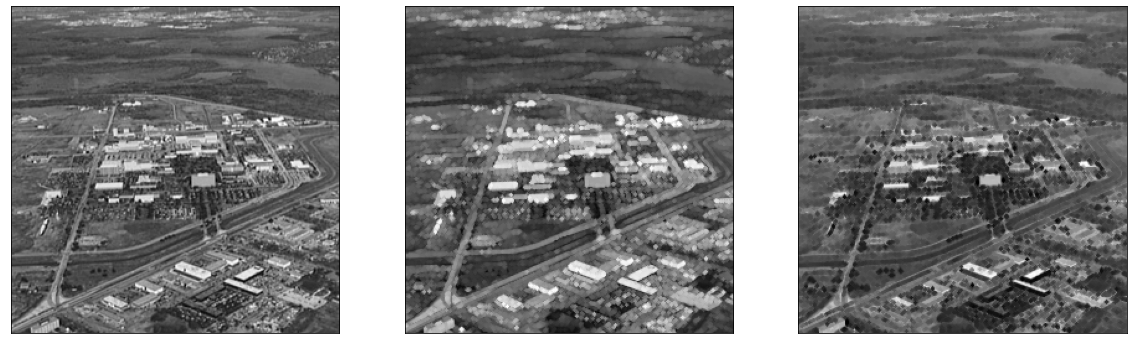

In [ ]:
pic8_orig = cv2.imread('pic.8.png',0)

kernel_Ones = np.ones([3, 3])

Dilation_Half  = morphology.dilation(pic8_orig, kernel_Diamond3)
Erosion_Half   = morphology.erosion(pic8_orig, kernel_Diamond3)

plt.figure(figsize = (20,20))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(image1_np, cmap='gray')
plt.subplot(1,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(Dilation_Half, cmap='gray')
plt.subplot(1,3,3), plt.xticks([]), plt.yticks([]), plt.imshow(Erosion_Half, cmap='gray')

##Півтонове розмикання та замикання

(<matplotlib.axes._subplots.AxesSubplot at 0x7f69948fa898>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f69948b7d68>)

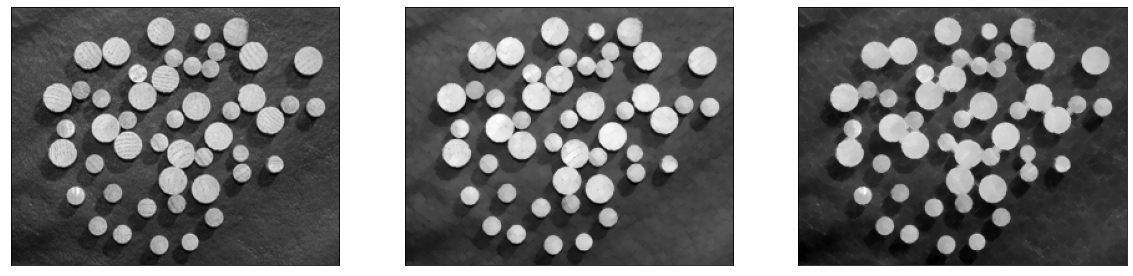

In [ ]:
pic9_orig = cv2.imread('pic.9.png',0)

kernel_Diamond5 = my.diamond(5)
opening_Half  = morphology.opening(pic9_orig, kernel_Diamond5)
closing_Half  = morphology.closing(pic9_orig, kernel_Diamond5)

plt.figure(figsize = (20,20))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic9_orig, cmap='gray')
plt.subplot(1,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(opening_Half, cmap='gray')
plt.subplot(1,3,3), plt.xticks([]), plt.yticks([]),plt.imshow(closing_Half, cmap='gray')

##Морфологічний градієнт

(<matplotlib.axes._subplots.AxesSubplot at 0x7f17e3f00940>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f17e3ec2e80>)

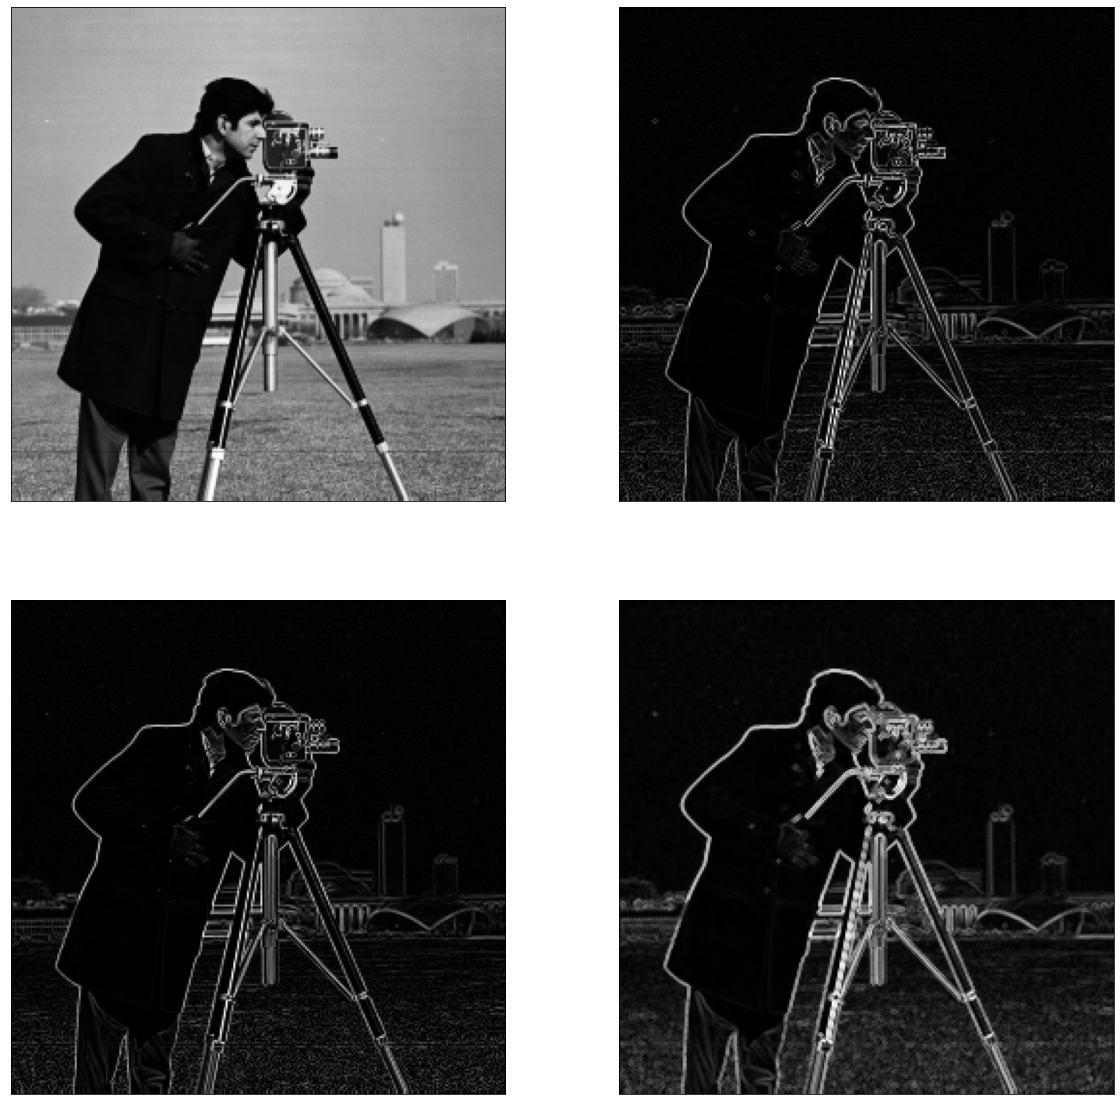

In [ ]:
pic10_orig = cv2.imread('cameraman.tif',0)

Dilation_Half  = morphology.dilation(pic10_orig, kernel_Diamond3) - pic10_orig
Erosion_Half   = pic10_orig - morphology.erosion(pic10_orig,  kernel_Diamond3)
ggg = Dilation_Half + Erosion_Half

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic10_orig, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(Dilation_Half, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(Erosion_Half, cmap='gray')
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(ggg, cmap='gray')

##Перетворення «виступ»

(<matplotlib.axes._subplots.AxesSubplot at 0x7f17e614e9b0>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f17e42defd0>)

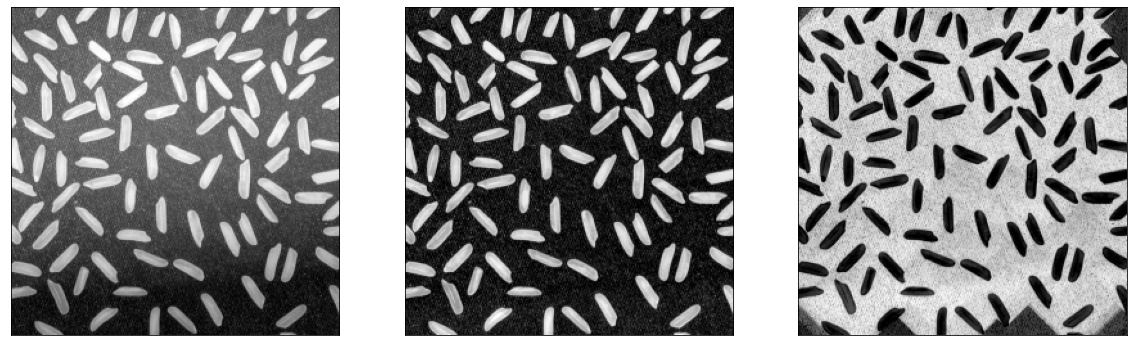

In [ ]:
pic11_orig = cv2.imread('rice.png',0)

kernel_Diamond40 = my.diamond(60)
Top_hat  = pic11_orig - morphology.opening(pic11_orig, kernel_Diamond40)
Bottom_hat = morphology.closing(pic11_orig, kernel_Diamond40) - pic11_orig

plt.figure(figsize = (20,20))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic11_orig, cmap='gray')
plt.subplot(1,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(Top_hat, cmap='gray')
plt.subplot(1,3,3), plt.xticks([]), plt.yticks([]), plt.imshow(Bottom_hat, cmap='gray')

##Морфологічна півтонова реконструкція

(<matplotlib.axes._subplots.AxesSubplot at 0x7f69943359e8>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 Text(0.5, 1.0, 'reconstruction'))

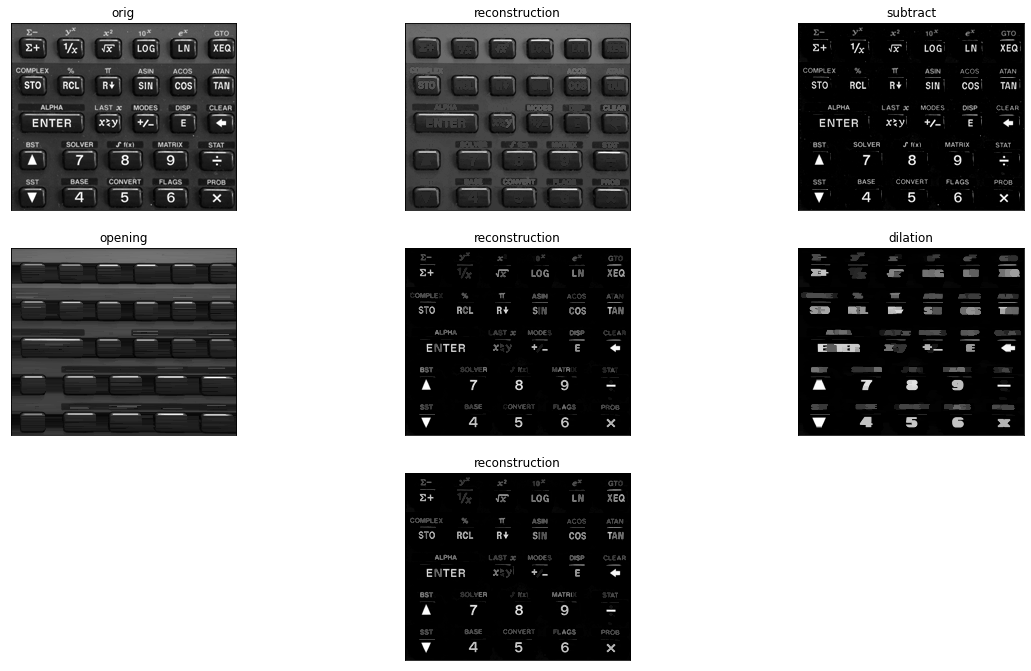

In [ ]:
pic12_orig = cv2.imread('pic.10.png', 0)

b     = np.ones([1, 17])
f_e   = morphology.erosion(pic12_orig, b)
f_r   = morphology.reconstruction(f_e, pic12_orig)
f_thr = np.subtract(pic12_orig, f_r) 

f_o   = morphology.opening(pic12_orig, b)
f_th = np.subtract(pic12_orig, f_o)

g_r   = morphology.reconstruction(morphology.erosion(f_thr, np.ones([1,4])), f_thr)
g_rd  = morphology.dilation(g_r, np.ones([1,5]))
f2 = morphology.reconstruction(np.minimum(g_rd, f_thr), f_thr)
                     
plt.figure(figsize = (20,20))
plt.subplot(5,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic12_orig, cmap='gray'), plt.title('orig')
plt.subplot(5,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(f_r, cmap='gray'), plt.title('reconstruction')
plt.subplot(5,3,3), plt.xticks([]), plt.yticks([]), plt.imshow(f_thr, cmap='gray'), plt.title('subtract')
plt.subplot(5,3,4), plt.xticks([]), plt.yticks([]), plt.imshow(f_o, cmap='gray'), plt.title('opening')
plt.subplot(5,3,5), plt.xticks([]), plt.yticks([]), plt.imshow(g_r, cmap='gray'), plt.title('reconstruction')
plt.subplot(5,3,6), plt.xticks([]), plt.yticks([]), plt.imshow(g_rd, cmap='gray'), plt.title('dilation')
plt.subplot(5,3,8), plt.xticks([]), plt.yticks([]), plt.imshow(f2, cmap='gray'), plt.title('reconstruction')